fractal 이어서
data based model: p(n+1) = p(n)+delta n = p(n) + a*p(n)(580-p(n)) -> 적절한 a, 580부분을 찾아야 함

#1. estimate population and compare it with data


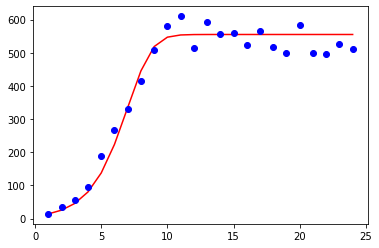

In [29]:
from pylab import *
data = loadtxt('pop.txt')
t=data[:,0]
p=data[:,1]
n=len(t)
d=zeros(n)
d[0] = p[0]
for i in range(1, n):
    d[i] = d[i-1]+0.0015*d[i-1]*(555-d[i-1])

plot(t, d, 'r-')
plot(t, p, 'ob')
show()


model fits the data well until 10, after that you can see the difference
problem #2. try to make model that can mimic the fluctuation of the data

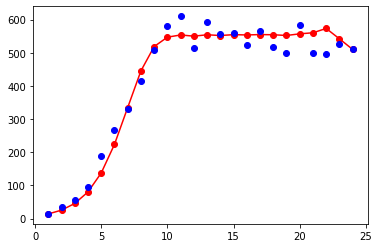

In [129]:
from random import randint

for i in range(10, n):
    if p[i]>d[i]:
        d[i] = d[i-1]+0.0015*randint(1, 2)*d[i-1]*(555-d[i-1])
    elif p[i]<d[i]:
        d[i] = d[i-1]+0.0015*randint(-3, -2)*d[i-1]*(555-d[i-1])
            
plot(t, d, 'or-')
plot(t, p, 'ob')
show()

celluar automata = ca = {G, E, U, F}
g - grid 1차원, 2차원/ e - state={0, 1}/ 
u - 1. von neumann: 상하좌우/ 2.moore: square box

# ex 1
ca = {z1, {0, 1}, {x-1, x, x+!}, f}
f = rule
    let s = s[i-1]+s[i]+s[i+!]
    if s>=1, s[i] = 1
    if s=0, s[i] = 0

[[0. 1. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]]


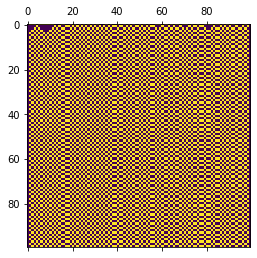

In [154]:
from random import randint
from pylab import *
tree = zeros((100, 100))

# rule 50
for i in range(1, 99):
    tree[0, i] = randint(0, 2)

for i in range(99):
    for j in range(1, 99):
        if tree[i,j]==0 and tree[i, j-1]+tree[i, j+1]>=1:
            tree[i+1, j]= 1;
print(tree)
matshow(tree)
show()

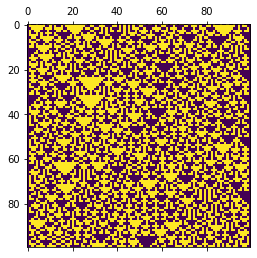

In [14]:
# rule 90
# tree = zeros((100, 100))
# for i in range(1, 99):
#     tree[0, i] = randint(0, 2)

# for i in range(99):
#     for j in range(1, 99):
#         s=''
#         for p in range(3):
#             s += str(tree[i, j+p-1])
#         print(s)
#         if s=='000' or s=='010' or s=='111' or s=='101':
#             tree[i+1, j]=0;
#         elif s=='100' or s=='011' or s=='001' or s=='110':
#             tree[i+1, j]=1;

# matshow(tree)
# show()

from random import randint
from pylab import *

t=zeros([100,100])
for i in range(1,99):
    t[0,i]=randint(0,2)
# print(t[0, :])
for i in range(1,100):
#     t_tmp = t*0
    for j in range (1,99):
        S=t[i-1,j-1]+t[i-1,j]+t[i-1,j+1]
        if t[i-1,j]==0 and (S==2 or S==0):
#             t_tmp[i,j]=0
            t[i,j]=0
        elif t[i-1,j]==1 and (S==2 or S==0):
#             t_tmp[i,j]=0
            t[i,j]=0
        else:
#             t_tmp[i,j]=1
            t[i,j]=1
#     t = t_tmp
matshow(t)

In [7]:
# unrealistic version
from random import randint
%pylab
map = zeros((100, 100))
map[50][50]=1
matshow(map)
for n in range(100):
    md = map*0
    for i in range(1, 99):
        for j in range(1, 99):
            if map[i-1,j]+map[i+1,j]+map[i,j-1]+map[i,j+1]>=1:
                md[i,j]=1;
            else:
                md[i,j]=0;
    map = md
    imshow(map)
    pause(0.01)
    clf()


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


KeyboardInterrupt: 

In [20]:
# realistic version with incubation period

from random import randint
%pylab
map = zeros((100, 100))
map[50][50]=1

for n in range(100):
    md = map*0
    for i in range(1, 99):
        for j in range(1, 99):
            if map[i-1,j]+map[i+1,j]+map[i,j-1]+map[i,j+1]>=1 and map[i,j]==0:
                md[i,j]=1;
            elif map[i,j]>=1 and map[i,j]<5:
                md[i,j] = map[i,j]+1;
            elif map[i,j]==5:
                md[i,j]=0;
    map = md
    clf()
    imshow(map)
    pause(0.01)
    

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


KeyboardInterrupt: 

In [26]:
# 이웃의 감염된 정도에 따라 확률 계산하여 감염 여부 계산

from random import randint
%pylab
map = zeros((100, 100))
map[50][50]=1

for n in range(100):
    md = map*0
    for i in range(1, 99):
        for j in range(1, 99):
            count = 0
            s =map[i-1,j]+map[i+1,j]+map[i,j-1]+map[i,j+1];
            if map[i+1,j]>0: count +=1;
            if map[i-1,j]>0: count +=1;
            if map[i,j-1]>0: count +=1;
            if map[i,j+1]>0: count +=1;

#             count = min(1,map[i-1,j])+min(1, map[i+1,j])+min(1,map[i,j-1])+min(1,map[i,j+1])
                
        
            if s>=1 and map[i,j]==0:
                r = rand()
                if r>=(count/4):
                    md[i,j] = 1;
            elif map[i,j]>=1 and map[i,j]<5:
                md[i,j] = map[i,j]+1;
            elif map[i,j]==5:
                md[i,j]=0;
    map = md
    clf()
    imshow(map)
    pause(0.01)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


KeyboardInterrupt: 

In [29]:
# 5명 랜덤하게 감염되어서 시작
from random import randint
%pylab
map = zeros((100, 100))

cnt =0
while cnt<5:
    i =randint(100)
    j =randint(100)
    if map[i,j]!=1:
        map[i,j]=1;
        cnt += 1

for n in range(100):
    md = map*0
    for i in range(1, 99):
        for j in range(1, 99):
            count = 0
            s =map[i-1,j]+map[i+1,j]+map[i,j-1]+map[i,j+1];
            if map[i+1,j]>0: count +=1;
            if map[i-1,j]>0: count +=1;
            if map[i,j-1]>0: count +=1;
            if map[i,j+1]>0: count +=1;

#             count = min(1,map[i-1,j])+min(1, map[i+1,j])+min(1,map[i,j-1])+min(1,map[i,j+1])
                
        
            if s>=1 and map[i,j]==0:
                r = rand()
                if r>=(count/4):
                    md[i,j] = 1;
            elif map[i,j]>=1 and map[i,j]<5:
                md[i,j] = map[i,j]+1;
            elif map[i,j]==5:
                md[i,j]=0;
    map = md
    clf()
    imshow(map)
    pause(0.01)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [60]:
# New Rule! 살아있는 사람이 몇인가 기준으로 & Moore Neighbor => Game of Life
from random import randint
%pylab
N=100
map = zeros((N, N))

for i in range(N):
    for j in range(N):
        map[i,j] = randint(0,2)
        
for n in range(200):
    md = map*0+map
    
    for i in range(1, N-1):
        for j in range(1, N-1):
            count=0
            if map[i+1,j]>0: count +=1;
            if map[i-1,j]>0: count +=1;
            if map[i,j-1]>0: count +=1;
            if map[i,j+1]>0: count +=1;
            if map[i-1,j-1]>0: count +=1;
            if map[i-1,j+1]>0: count +=1; 
            if map[i+1,j-1]>0: count +=1;
            if map[i+1,j+1]>0: count +=1;

#             count = min(1, map[i-1, j-1])+min(1, map[i-1, j+1])+min(1, map[i-1, j])+min(1, map[i,j-1])+min(1, map[i,j+1])+min(1,map[i+1,j-1])+min(1,map[i+1,j])+min(1, map[i+1,j+1])
            
            if count<2 and map[i,j]==0:
                md[i,j]=1;
            elif count==2 or count==3:
                if map[i,j]==0:
                    md[i,j]=0;
            elif count>3 and map[i,j]==0:
                md[i,j]=1;
            elif count==3 and map[i,j]==1:
                md[i,j]=0;
        
    map = md
    clf()
    imshow(map)
    pause(0.5)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


KeyboardInterrupt: 

In [87]:
# random walk

from random import randint
%pylab
N=100
map = zeros((N, N))

for i in range(int(N/2-10),int(N/2+10)+1):
    for j in range(int(N/2-10),int(N/2+10)+1):
        map[i,j]=1

for n in range(100):
    md = map*0
    
    for i in range(1,N-1):
        for j in range(1,N-1):
            if(map[i,j]==1):
                md[i,j]=0
                x=i
                y=j
                r = randint(0,4)

                if r==0:
                    x += 1
                elif r==1:
                    x -= 1
                elif r==2:
                    y -= 1
                elif r==3:
                    y += 1
                    
                md[x,y]=1;
    map = md
    clf()
    imshow(map)
    pause(0.01)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


KeyboardInterrupt: 